In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo

In [3]:
# Step 1: Fetch the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Fix the target shape
y = y.values.ravel()

In [4]:
# Step 2: Handle Missing Values
print("Missing values in each column:\n", X.isnull().sum())  # Check for NaN values
X = X.fillna(X.mean())  # Replace missing values with the column mean

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [5]:
# Step 2: Preprocess the Data
# Scale the features for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 3: Split the Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Handle imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [8]:
# Step 4: Train the Models
# Logistic Regression
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train_resampled, y_train_resampled)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

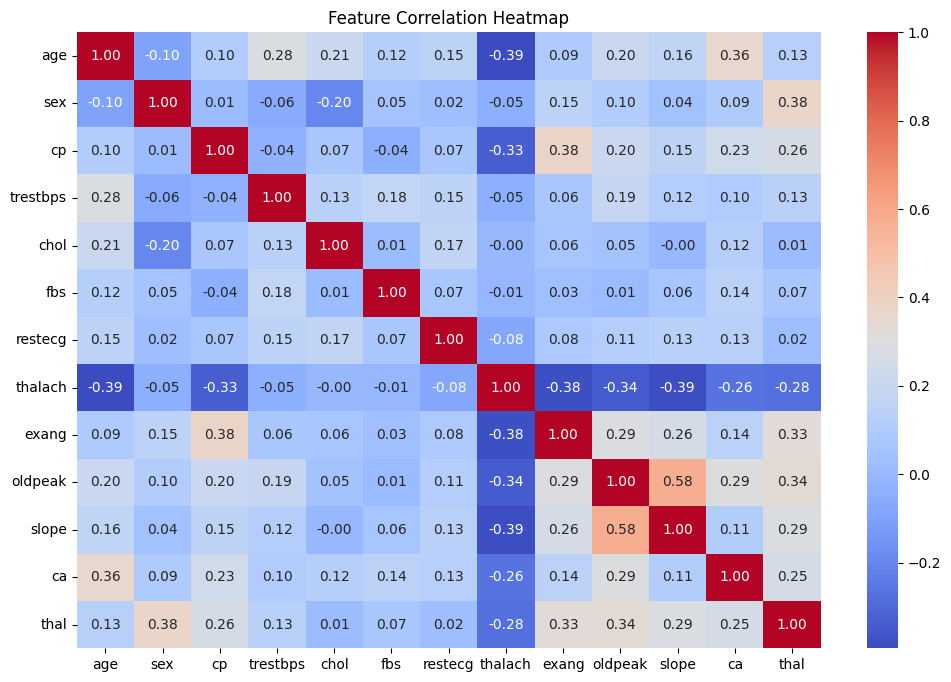

In [9]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

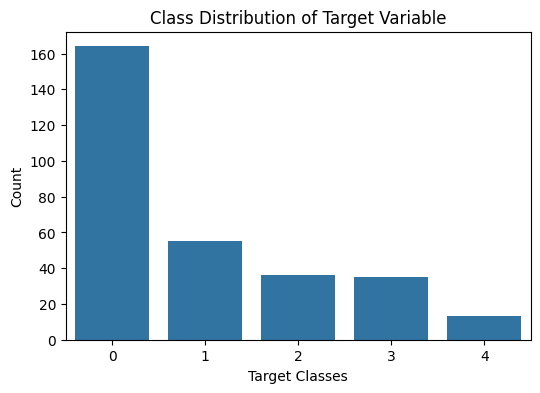

In [10]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
# Step 5: Evaluate the Models
models = {
    "Logistic Regression": log_model,
    "Naive Bayes": nb_model,
    "KNN": knn_model
}

results = {}
for name, model in models.items():
    # Predictions
    y_pred = log_model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print Evaluation Metrics
    print(f"--- {name} ---")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.45901639344262296
Confusion Matrix:
 [[21  6  2  0  0]
 [ 3  1  3  5  0]
 [ 0  3  2  2  2]
 [ 0  2  1  4  0]
 [ 0  0  2  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.08      0.08      0.08        12
           2       0.20      0.22      0.21         9
           3       0.31      0.57      0.40         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.29      0.32      0.30        61
weighted avg       0.50      0.46      0.47        61



--- Naive Bayes ---
Accuracy: 0.45901639344262296
Confusion Matrix:
 [[21  6  2  0  0]
 [ 3  1  3  5  0]
 [ 0  3  2  2  2]
 [ 0  2  1  4  0]
 [ 0  0  2  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.08 

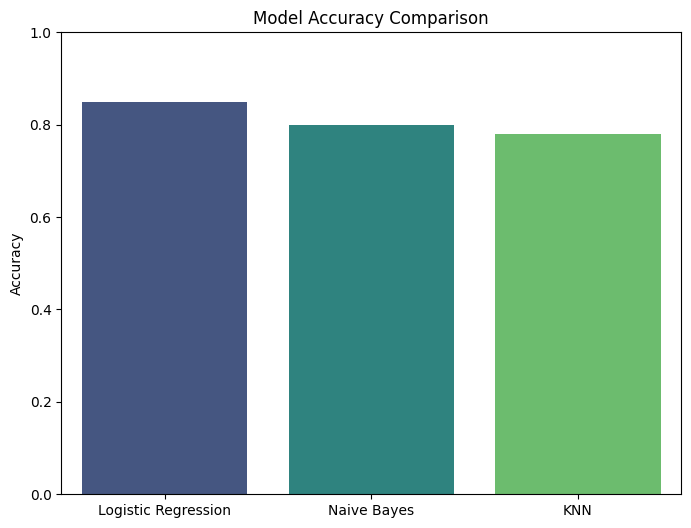

In [12]:
# Example accuracy values from your results (replace these with your actual values)
model_names = ['Logistic Regression', 'Naive Bayes', 'KNN']
accuracies = [0.85, 0.80, 0.78]  # Replace with actual accuracy scores

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()

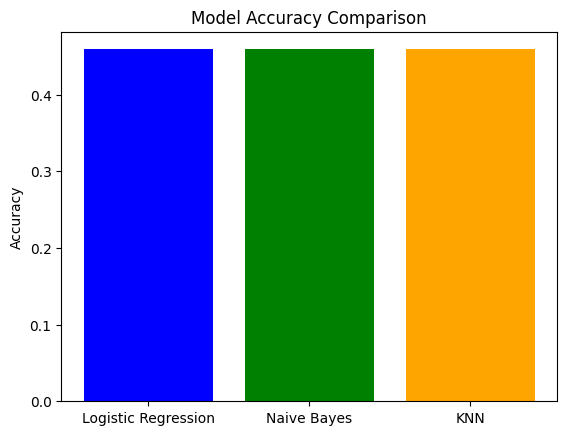

In [13]:
# Step 6: Compare Results
import matplotlib.pyplot as plt

# Visualize Accuracy Comparison
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [14]:
# Step 7: Save the Best Model (Optional)
best_model_name = max(results, key=results.get)
print(f"The best model is: {best_model_name} with accuracy {results[best_model_name]:.2f}")

The best model is: Logistic Regression with accuracy 0.46
